In [ ]:

## refref process images in real time (simple bee in / out at each timestep)

import nectarUtils
from nectarUtils import *
import nectarUtils as nu

import beeDataAcq
from beeDataAcq import cameraSetup, saveVid

import importlib

from multiprocessing import Process, Pipe


%matplotlib inline
print(sys.version)
print(sys.executable)

# define directories
baseDir = os.getcwd()

# may want to make this directory somewhere else, if dropbox becomes a problem
dataDir = r"D:\Dropbox\AcademiaDropbox\UW\BeeDecisionProject\NectarData"
if not os.path.isdir(dataDir):
    os.mkdir(dataDir)

figDir = r"D:\Dropbox\AcademiaDropbox\UW\BeeDecisionProject\NectarFigs"
if not os.path.isdir(figDir):
    os.mkdir(figDir)

In [ ]:
# check cameras
parent_conn, child_conn = Pipe()
p = Process(target=cameraSetup.main, args=(child_conn, ))
p.start()

In [ ]:
# send stop signal
parent_conn.send("stop")

In [ ]:
# list serial ports
nu.serial_ports()

In [ ]:
# connect to com8
PORT1 = "COM4"
connected1 = False
if "ser1" in globals():
    ser1.close()
ser1 = serial.Serial(PORT1,9600, timeout=1.0) # stop if no data comes in 1 second
while not connected1:
    serin1 = ser1.read()
    connected1 = True
    print("connected to arduino on " + PORT1)
str(ser1.readline().decode("UTF-8"))    

In [ ]:
# connect to com8
PORT2 = "COM8"
connected2 = False
if "ser2" in globals():
    ser2.close()
ser2 = serial.Serial(PORT2,9600, timeout=1.0) # stop if no data comes in 1 second
while not connected2:
    serin2 = ser2.read()
    connected2 = True
    print("connected to arduino on " + PORT2)
str(ser2.readline().decode("UTF-8"))    

In [ ]:
ser2.write("ff".encode("utf-8"))

In [ ]:
ser1.write("ff".encode("utf-8"))

In [ ]:
ser2.write("ff".encode("utf-8"))
ser1.write("ff".encode("utf-8"))

In [ ]:
# calibrate both at the same time

_ = importlib.reload(nectarUtils)



In [ ]:
cal1, cal2 = nu.multiCalibrate(ser1, ser2)
#cal1 = nu.multiCalibrate(ser1) # can use this function to do a single calibration

In [ ]:
# cal2 = nu.multiCalibrate(ser2)

In [ ]:
_ = importlib.reload(nectarUtils)
nu.plotCalibration(cal1)
nu.plotCalibration(cal2)


In [ ]:
dataDir

In [ ]:
tmpDat = np.empty(3, dtype = '<U26')

In [ ]:
import datetime
tmpDat[0] = str(datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S_%f")[:-3])

In [ ]:
tmpDat

# video processing

In [1]:
import numpy as np
import cv2
import datetime
import PyCapture2 as fc2
import sys
import time
import os
import re
import skimage.io as io
%matplotlib inline
import matplotlib.pyplot as plt

import beeDataAcq.cameraSetup
import beeDataAcq.saveVid

In [68]:
import importlib
_ = importlib.reload(beeDataAcq.saveVid)
_ = importlib.reload(beeDataAcq.cameraSetup)


TimeStamp is enabled.


TimeStamp is enabled.



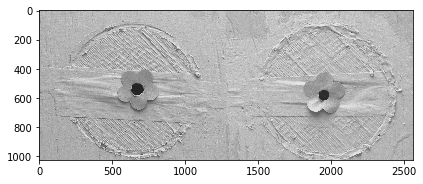

In [69]:
calImg1, calImg2 = beeDataAcq.saveVid.getCalibrationImages()


TimeStamp is enabled.


TimeStamp is enabled.



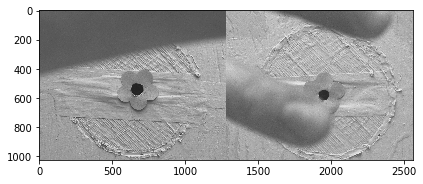

In [70]:
calImg11, calImg22 = beeDataAcq.saveVid.getCalibrationImages()


TimeStamp is enabled.


TimeStamp is enabled.



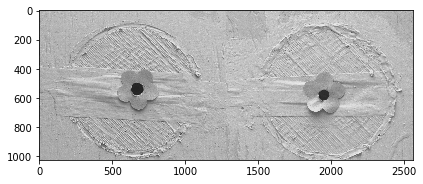

In [367]:
calImg111, calImg222 = beeDataAcq.saveVid.getCalibrationImages()

In [142]:
# black is 0, white is 255
print(calImg1[0:3, 0:3])
print(calImg11[0:3, 0:3])

[[ 64 114  17]
 [229 172 157]
 [204 165 162]]
[[ 80  17 177]
 [121 101  91]
 [118  99  98]]


In [143]:
# How much could it possibly change?
# how much darker can the image get? -- darker == lower numbers
possibleChange = calImg1[0:3, 0:3]
possibleChange

array([[ 64, 114,  17],
       [229, 172, 157],
       [204, 165, 162]], dtype=int16)

In [368]:
# calculate percent change
im1Diff = (calImg2 - calImg222) 

# negative means it got lighter, positive means it got darker
im1Diff

array([[ -56, -128, -221, ...,  -15,   -8,   -2],
       [  -2,   -5,    6, ...,   11,    9,    9],
       [  -1,   -9,    0, ...,  -17,    0,   -1],
       ..., 
       [   7,   -6,    9, ...,    0,   -2,   -1],
       [   6,  -12,   -3, ...,    9,    3,    9],
       [   7,   -6,    7, ...,    6,    2,    3]], dtype=int16)

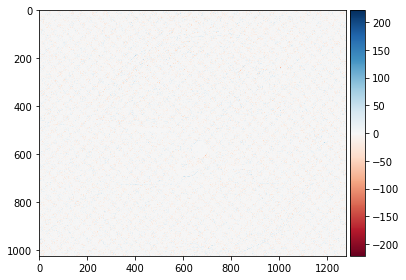

In [369]:
io.imshow(im1Diff) # positive means it got darker

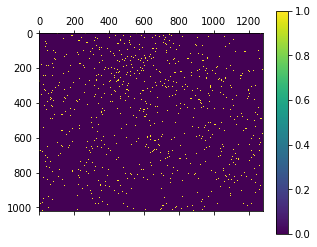

In [370]:
# threshold image where it changed a lot (more than 50)
plt.matshow((np.abs(im1Diff)>20) * 1, vmin=0, vmax=1)
plt.colorbar()

In [371]:
# convert to 8bit
#img8 = ((im1Diff + 256)/2).astype('uint8')
img8 = ((np.abs(im1Diff)>50) * 255).astype('uint8')
img8 = cv2.bitwise_not(img8)

In [372]:
(np.abs(im1Diff)>20)*1*255

array([[255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

C:\Users\Combes4\Anaconda2\envs\NectarCamera\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


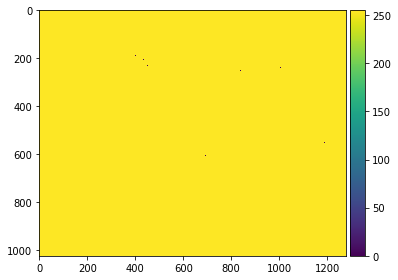

In [373]:
io.imshow(img8)

In [376]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img8,(121,121),0)

C:\Users\Combes4\Anaconda2\envs\NectarCamera\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


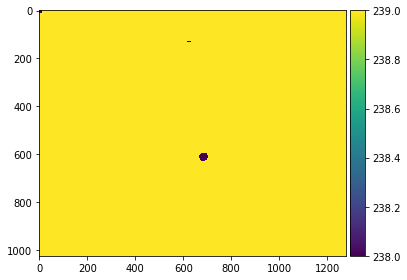

In [377]:
io.imshow(blur)

In [378]:
ret,th3 = cv2.threshold(blur,110,255,cv2.THRESH_BINARY_INV)
# I manually chose a threshold of 125 above

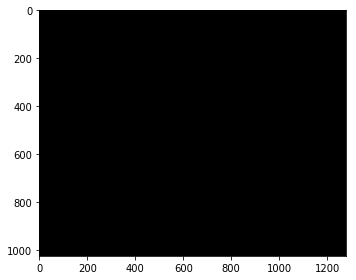

In [379]:
# now get rid of the leafy bits
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
erosion = cv2.erode(th3,kernel,iterations = 3)

dilation = cv2.dilate(erosion, kernel, iterations = 3)
io.imshow(dilation)

In [380]:
img, cnts, _ = cv2.findContours(dilation.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
mask = np.ones(img8.shape[:2], dtype="uint8") * 0 # create a blank black mask

In [381]:
len(cnts)

0

In [382]:
# find bad contours
def is_contour_good(c, img):
    # approximate the contour
    area1 = cv2.contourArea(c, False) 

    # the contour is 'bad' if it is really small (less then 1000 px)
    x,y,w,h = cv2.boundingRect(c)       
    if area1 < 1000:
        return False              
    else:
        return True

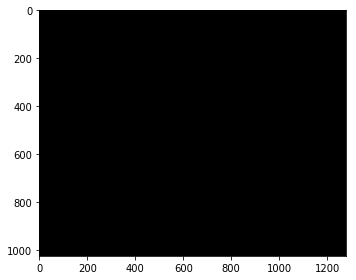

In [383]:
# loop over the contours
for c in cnts:
    # if the contour is good, draw it on the mask (draw white on a black background)
    if is_contour_good(c, img8):
        cv2.drawContours(mask, [c], -1, 255, -1)

io.imshow(mask)
plt.show()

In [384]:
img, cts, _ = cv2.findContours(mask.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [385]:
len(cts)

0

In [238]:
print(cv2.__version__)

params.filterByArea = True
params.minArea = 30

detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
keypoints = detector.detect(img8)
print(keypoints)

3.3.0
[]


In [215]:
im_with_keypoints = cv2.drawKeypoints(img8, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

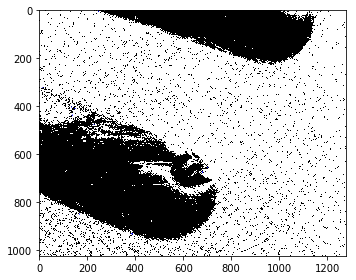

In [216]:
io.imshow(im_with_keypoints)

In [204]:
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)


113

In [205]:
cv2.destroyAllWindows()

In [161]:
# Set up the detector with default parameters.
im=cv2.bitwise_not(im1Diff)

params = cv2.SimpleBlobDetector_Params()
detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)
im=cv2.bitwise_not(im)

error: C:\bld\opencv_1506444099358\work\opencv-3.3.0\modules\features2d\src\blobdetector.cpp:320: error: (-210) Blob detector only supports 8-bit images! in function cv::SimpleBlobDetectorImpl::detect


In [139]:
percChange = np.divide(im1Diff, possibleChange)

In [140]:
percChange

array([[ -7.61904762e-01,   9.15094340e-01,  -6.95652174e+00],
       [  2.16450216e-02,  -5.40540541e-03,   5.23560209e-02],
       [  1.83486239e-02,   6.62983425e-02,   5.46448087e-02]])

In [141]:
np.max(percChange)

0.91509433962264153

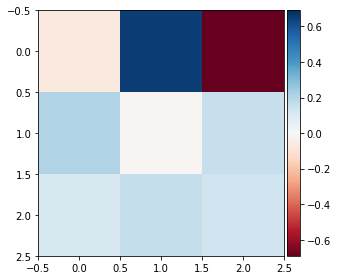

In [131]:
io.imshow(percChange)

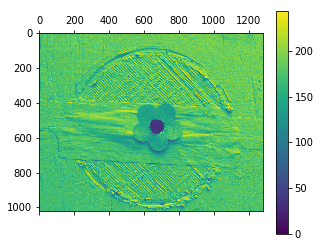

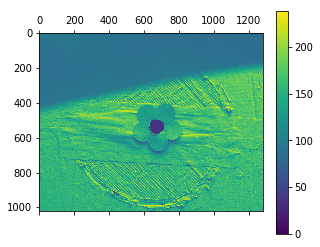

In [71]:
plt.matshow(calImg1)
plt.colorbar()
plt.show()
plt.matshow(calImg11)
plt.colorbar()
plt.show()

In [72]:
im1Diff = calImg1 - calImg11
np.min(im1Diff)

-160

In [76]:
im1Diff = np.subtract(calImg2, calImg22)

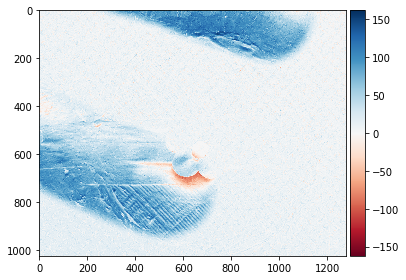

In [77]:
io.imshow(im1Diff)

C:\Users\Combes4\Anaconda2\envs\NectarCamera\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


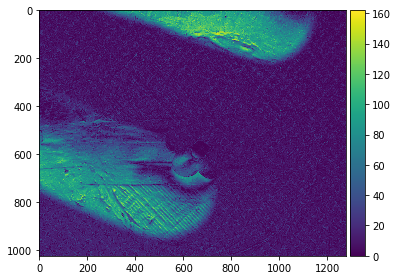

In [78]:
io.imshow(np.abs(im1Diff))

In [ ]:
# calculate change as portion of possible change

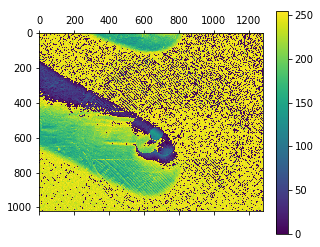

In [24]:
plt.matshow(im1Diff)
plt.colorbar()

In [25]:
np.min(im1Diff)

0

# Simultaneous data collection


In [ ]:
_ = importlib.reload(nectarUtils)


In [ ]:
# start video (asynchronously) -- pthe process is stopped with parent_conn.send("stop")
parent_conn, child_conn = Pipe()
p = Process(target=saveVid.main, args=(child_conn, ))
p.start()



In [ ]:
# this is not asynchronous -- you must press "q" in the command prompt twice to exit
dat1, dat1_file, dat2, dat2_file= nu.multiReadAndSave(ser1, ser2, cal1, cal2,
                                                       dataDir = dataDir, maxTime = 30)
print("DONE")

In [ ]:
parent_conn.send("stop")

In [ ]:
if parent_conn.poll():
    movieFileName = parent_conn.recv()
else:
    movieFileName = "unknown"
print(movieFileName)

In [ ]:
# combine datasets
dat_combined = dat1.append(pd.DataFrame( dat2), ignore_index=True)
dat_combined["video_file"] = np.nan
dat_combined.loc[0,"video_file"] = movieFileName
#dat_combined.loc[1, "notes"] = movieFileName + str("    MovieFile")
dat_combined.head()

In [ ]:
# save combined dataset
dat_combined.to_csv(os.path.join(dataDir, np.sort([dat2_file, dat1_file])[0].replace(".", "___cmbnd.")), index = False)

In [ ]:
# remove individual datasets
if os.path.isfile(os.path.join(dataDir, dat1_file)):
    os.remove(os.path.join(dataDir, dat1_file))
else: 
    print("File doesn't exist")
if os.path.isfile(os.path.join(dataDir, dat2_file)):
    os.remove(os.path.join(dataDir, dat2_file)) 
else: 
    print("File doesn't exist")



In [ ]:
dataDir

In [ ]:
### refref: save data for when bee is in or out of camera view
## see saveVid file
## may need a calibration

In [ ]:
import subprocess

In [ ]:
# refref here: 
# I want to start a subprocess to collect video data
subprocess.check_call(r"for i in 1 2 3 4 5; do sleep 0.1s; done", shell=True)

In [ ]:
nu.plotTrial(dat1)
nu.plotTrial(dat2)

In [ ]:
plt.figure(figsize = [15,4])
plt.plot(dat_combined.loc[dat_combined.port == "COM8"]["timestamp"],
         dat_combined.loc[dat_combined.port == "COM8"][["top", "mid", "base"]], '-', marker = "o")

plt.show()
plt.figure(figsize = [15,4])
plt.plot(dat_combined.loc[dat_combined.port == "COM4"]["timestamp"],
         dat_combined.loc[dat_combined.port == "COM4"][["top", "mid", "base"]], '-', marker = "o")
plt.show()
#dat_combined.loc[dat_combined.port == "COM4"].plot(y = "base", x = "timestamp")

In [ ]:
_ = importlib.reload(nectarUtils)
t = threading.Thread(target = nu.readAndSave, kwargs={"serial_con" : ser2, "calibrationInfo" : cal2 , 
                                                     "dataDir" : dataDir})
t.start()

In [ ]:
t

In [ ]:
_ = importlib.reload(nectarUtils)
nu.readAndSave(serial_con = ser2, calibrationInfo= cal2, dataDir = dataDir)

In [ ]:
#cal2['topBaseline', 'midBaseline', 'baseBaseline', 'colNames', 'port', 'base_dec_bound', 'mid_dec_bound']